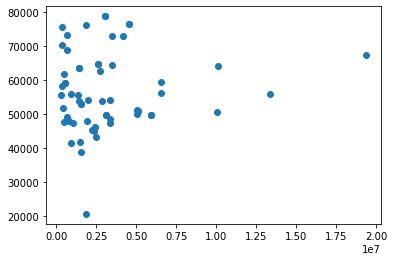

   Unnamed: 0       State  TotalPop   Hispanic      White      Black  \
0           0     Alabama   4830620   3.751616  61.878656  31.252976   
1           1      Alaska    733375   5.909581  60.910180   2.848503   
2           2     Arizona   6641928  29.565921  57.120000   3.850987   
3           3    Arkansas   2958208   6.215474  71.137810  18.968759   
4           4  California  38421464  37.291875  40.215789   5.677396   

      Native      Asian   Pacific        Income            GenderPop  \
0   0.453231   1.050255  0.034354  43296.358603    2341093M_2489527F   
1  16.391018   5.450299  1.058683  70354.743902      384160M_349215F   
2   4.355066   2.876579  0.167632  54207.820955    3299088M_3342840F   
3   0.522920   1.142336  0.146861  41935.633968    1451913M_1506295F   
4   0.405292  13.052234  0.351410  67264.782303  19087135M_19334329F   

        Men       Women  tot_by_race  
0   2341093   2489527.0    98.421088  
1    384160    349215.0    92.568263  
2   3299088   334

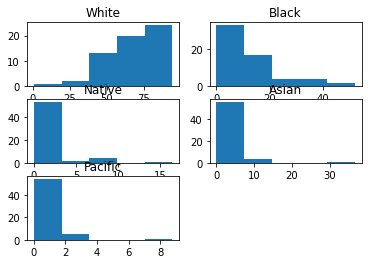

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Loading Data

files = glob.glob("censusData/states*.csv")
df_list = []
for filename in files:
  data = pd.read_csv(filename)
  df_list.append(data)

us_census = pd.concat(df_list)

# Changing Data Type

us_census.Income = us_census['Income'].replace('[\$]', '', regex=True)
us_census.Income = pd.to_numeric(us_census.Income)

# Splitting by character

men_women_split = us_census.GenderPop.str.split('_')
us_census['Men'] = men_women_split.str.get(0)
us_census['Women'] = men_women_split.str.get(1)

us_census.Men = us_census['Men'].replace('[M]', '', regex=True)
us_census.Men = pd.to_numeric(us_census.Men)
us_census.Women = us_census['Women'].replace('[F]', '', regex=True)
us_census.Women = pd.to_numeric(us_census.Women)

us_census = us_census.fillna(value={'Women':us_census.TotalPop - us_census.Men})

duplicates = us_census.duplicated()
# print(duplicates.value_counts())
us_census = us_census.drop_duplicates()

plt.scatter(us_census.Women, us_census.Income)
plt.show()


# Preparing Histogram

us_census.Hispanic = us_census['Hispanic'].replace('[\%]', '', regex=True)
us_census.Hispanic = pd.to_numeric(us_census.Hispanic)

us_census.White = us_census['White'].replace('[\%]', '', regex=True)
us_census.White = pd.to_numeric(us_census.White)

us_census.Black = us_census['Black'].replace('[\%]', '', regex=True)
us_census.Black = pd.to_numeric(us_census.Black)

us_census.Native = us_census['Native'].replace('[\%]', '', regex=True)
us_census.Native = pd.to_numeric(us_census.Native)

us_census.Asian = us_census['Asian'].replace('[\%]', '', regex=True)
us_census.Asian = pd.to_numeric(us_census.Asian)

us_census.Pacific = us_census['Pacific'].replace('[\%]', '', regex=True)
us_census.Pacific = pd.to_numeric(us_census.Pacific)

us_census = us_census.fillna(value={'Pacific':(100 - us_census.Hispanic - us_census.White - us_census.Black - us_census.Native - us_census.Asian)})

us_census['tot_by_race'] = us_census['Hispanic'] + us_census['White'] + us_census['Black'] + us_census['Native'] + us_census['Asian'] + us_census['Pacific']
# print(us_census.tot_by_race)
# print(us_census.Pacific)

# print(us_census.columns)
# print(us_census.dtypes)
print(us_census.head())
print(us_census.info())
n_bins = 5
plt.figure(1)
plt.subplot(3,2,1)
plt.hist(us_census.White, n_bins)
plt.title('White')
plt.subplot(3,2,2)
plt.hist(us_census.Black, n_bins)
plt.title('Black')
plt.subplot(3,2,3)
plt.hist(us_census.Native, n_bins)
plt.title('Native')
plt.subplot(3,2,4)
plt.hist(us_census.Asian, n_bins)
plt.title('Asian')
plt.subplot(3,2,5)
plt.hist(us_census.Pacific, n_bins)
plt.title('Pacific')
plt.show()